In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/Simple_linear_regression.csv')
print(df.to_string())

df.plot.scatter('X','Y')

X = np.asarray(df.X.values)
y = np.asarray(df.Y.values)

m = len(y)
X = np.vstack((np.ones(m),X.T)).T
print(X)

Declaring Theta

In [ ]:
# Plot data and Hypothesis: set theta manually

theta_0 = 28
theta_1 = 0.32

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X[:,[1]], y,  color='black') 

# Plot a red line corrensponding to our Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)

Cost Function


In [ ]:
# Calculate the Cost Function
def CostFunction(X, y, theta):
    
    # number of training examples
    m = len(y) 
    
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta
    h = np.sum(np.multiply(X, theta), axis=1)
    
    # Calculate the Squared Error = (h - y)^2 (vectorized)
    SquaredError = np.power(np.subtract(h,y), 2)
    
    # Calculate the Cost J
    J = 1/(2*m) * np.sum(SquaredError)
    
    return J

CostFunction(X,y,theta)

111.31230222222226

Gradient Descent

In [ ]:
def gradientDescent(X, y, theta, alpha):
    
    # number of training examples
    m = len(y) 

    # Initialize J_history and Theta_history
    J_history = 100.0
    J = 0.0
    
    while J_history - J > 0.001:
        
        J_history = J

        # Calculate h = X * theta
        h = np.sum(np.multiply(X,theta), axis=1)
    
        # Calculate the error = (h - y)
        error = np.subtract(h, y)
                
        # Update theta
        theta = np.subtract(theta, alpha * 1/m * np.sum(np.multiply(X.T, error), axis=1))
        
        # Calculate New J 
        J = CostFunction(X, y, theta)

        
    return theta, J

Running Gradient Descent

In [ ]:
# Initialize theta
theta = np.asarray([28,0.32]).astype(float)

#declaring alpha
alpha = 0.001

# Run the gradientDescent() function, and collect the output in "results"
results = gradientDescent(X, y, theta, alpha)

# Get the theta from the results
theta = results[0] # new theta

# Get J 
J = results[1] # Cost funtion

Plot Final Result

[27.99618756 -2.57237689]
2003353.0523858813


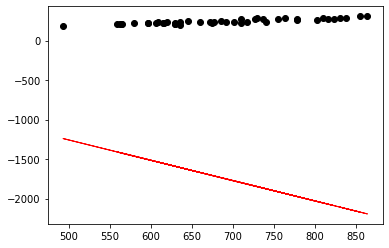

In [ ]:
print(theta)
print(J)

# Plot training set
plt.scatter(X[:,[1]], y,  color='black')

# Plot Hypothesis (theta were calculated with the Gradient Descent)
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)